<a href="https://colab.research.google.com/github/juanninocruz/Estadistica/blob/main/Taller%202_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

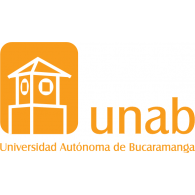


**Taller Desarrollo de Modelos No supervisados**

Presentado Por: Juan Carlos Niño Cruz

**1. Cargar y Preprocesar los Datos**


Este bloque de código realiza una serie de pasos fundamentales para cargar, procesar y visualizar un conjunto de datos. A continuación, explico cada paso del código proporcionado.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/multiforma.csv"
data = pd.read_csv(url)
# Visualizar las primeras filas de los datos
data

x         y
0    -0.803739 -0.853053
1     0.852851  0.367618
2     0.927180 -0.274902
3    -0.752626 -0.511565
4     0.706846  0.810679
...        ...       ...
1095  0.956063 -2.473828
1096  0.930758 -2.366531
1097  0.989555 -2.475225
1098  0.979200 -2.637578
1099  1.121931 -2.619054

[1100 rows x 2 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1100 non-null   float64
 1   y       1100 non-null   float64
dtypes: float64(2)
memory usage: 17.3 KB


In [14]:
data.describe()

x            y
count  1100.000000  1100.000000
mean     -0.081222    -0.625431
std       0.644967     1.176170
min      -1.489180    -3.353462
25%      -0.478839    -1.126752
50%      -0.132920    -0.297040
75%       0.366072     0.250817
max       1.492208     1.253874

**2. Es importante validar que el dataset los datos no tengan nulos.**

In [15]:
data.isnull().sum()

x    0
y    0
dtype: int64

**3. De igual forma se valida que no tenga Outliers**

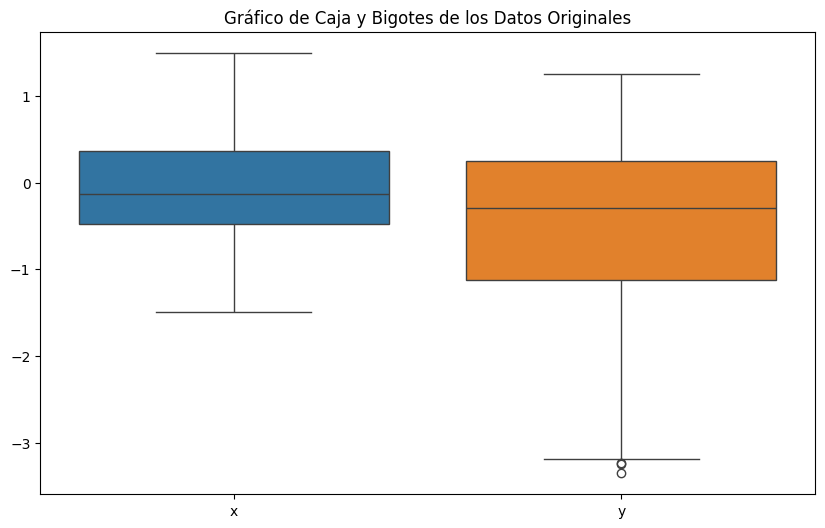

In [16]:
# Seleccionar sólo las columnas numéricas
numerical_data = data[['x', 'y']]
# Crear el gráfico de caja y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_data)
plt.title('Gráfico de Caja y Bigotes de los Datos Originales')
plt.show()

Teniendo en cuenta el gráfico anterior, el atributo "y" tiene outliers; por lo cual se procede a reemplazarlos.

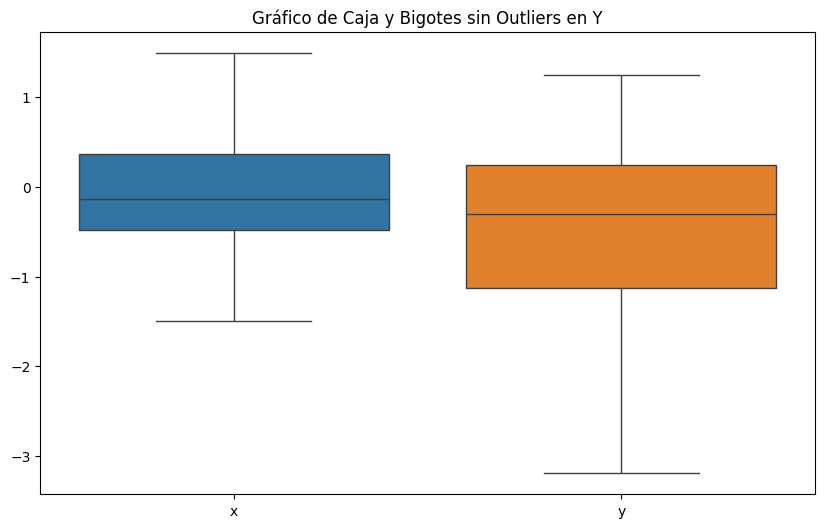

In [17]:
# Cálculo de límites usando el método del IQR (rango intercuartílico)
Q1 = data["y"].quantile(0.25)
Q3 = data["y"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Crear una copia para no afectar los datos originales
numerical_data_corr = numerical_data.copy()

# Reemplazar valores fuera de rango por winsorización (límite más cercano)
numerical_data_corr["y"] = numerical_data_corr["y"].clip(lower=lower_limit, upper=upper_limit)

# Graficar nuevamente las cajas sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_data_corr)
plt.title('Gráfico de Caja y Bigotes sin Outliers en Y')
plt.show()

**4. Estandarizar las variables**

Este paso estandariza las características seleccionadas para garantizar que estén en la misma escala. Esto es esencial en métodos de clustering como DBSCAN, que dependen de las
distancias entre puntos y pueden verse afectados por diferencias en las magnitudes de las variables.

In [18]:
# Seleccionar las columnas numéricas para la segmentación
numerical_data_corr = data[['x', 'y']]
# Normalizar los datos numéricos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data_corr)
# Visualizar las primeras filas de los datos escalados
data_scaled

array([[-1.12074865, -0.19361551],
       [ 1.44890658,  0.8446917 ],
       [ 1.56420327,  0.29816112],
       ...,
       [ 1.66095792, -1.57344151],
       [ 1.64489599, -1.71153969],
       [ 1.86629599, -1.69578267]])

**5. Determinación de Hiperparámetros para el modelo**

El siguiente código crear varios modelos DBSCAN y los grafica, adicionalmente se calcúla el silhouette; con esto se debe seleccionar el mejor modelo.

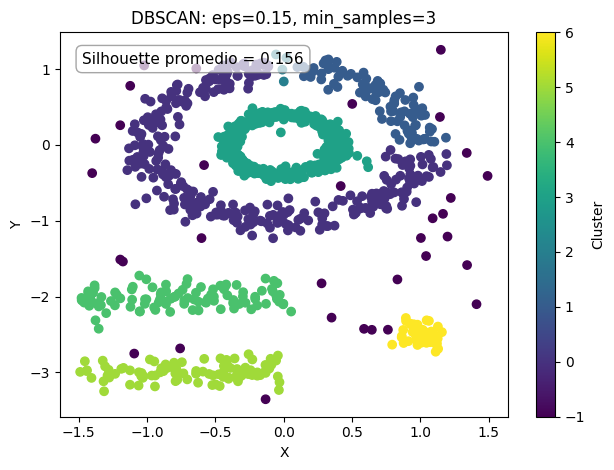

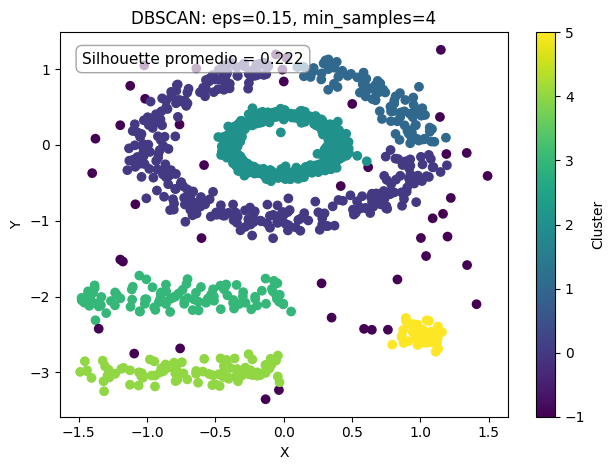

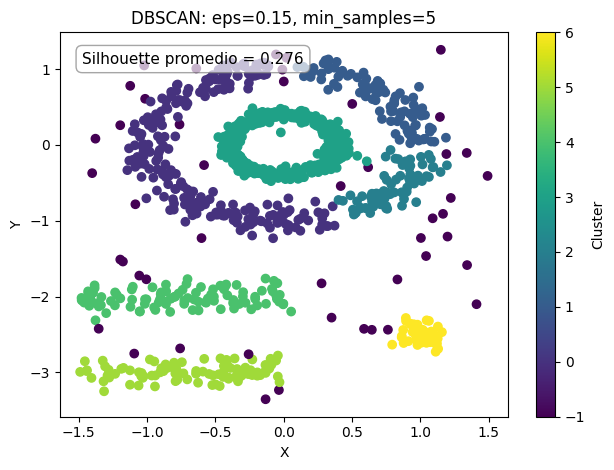

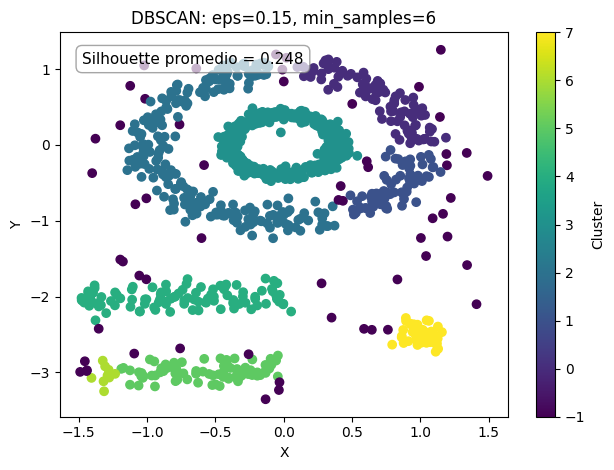

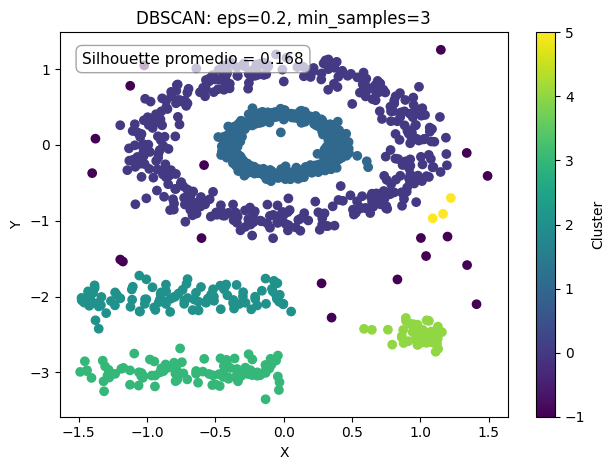

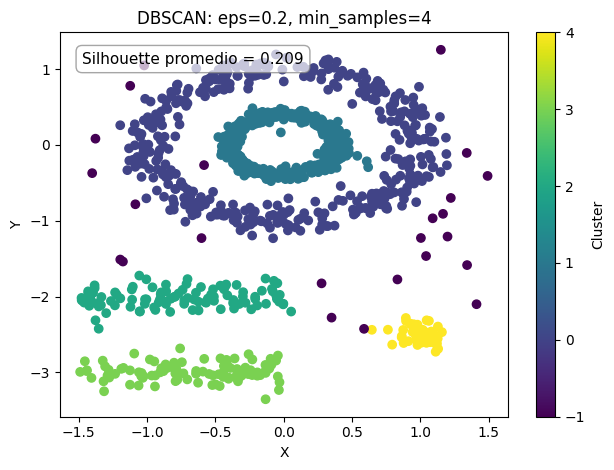

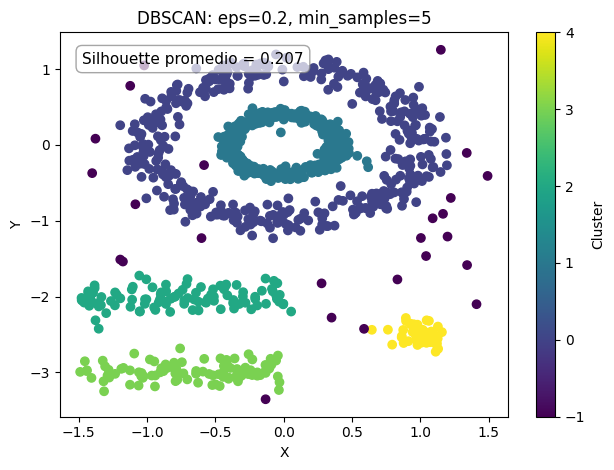

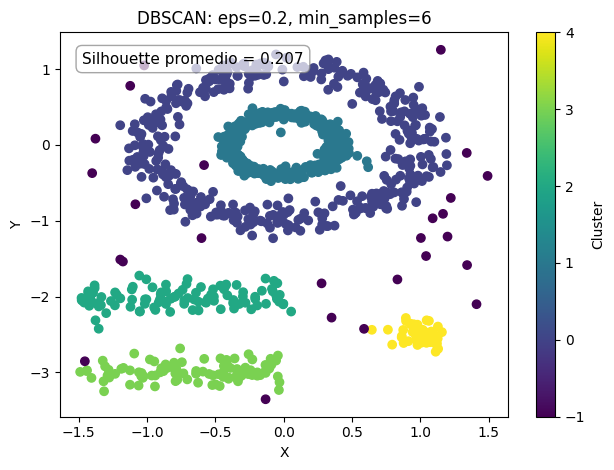

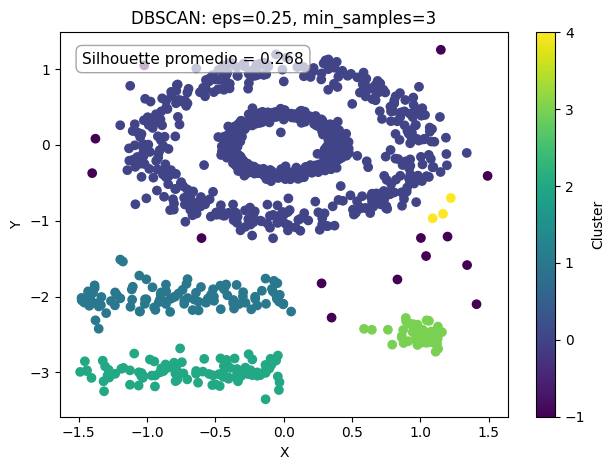

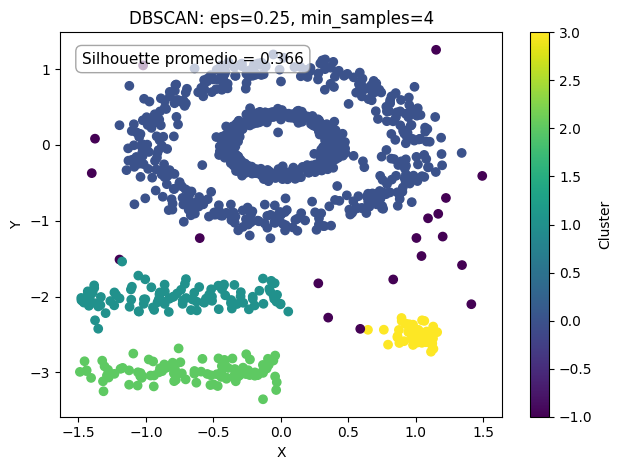

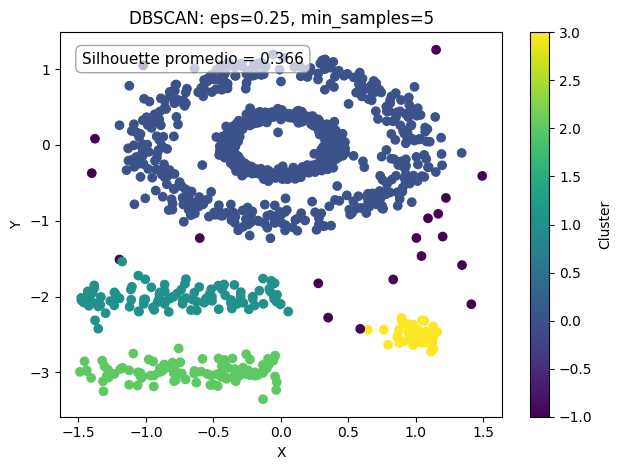

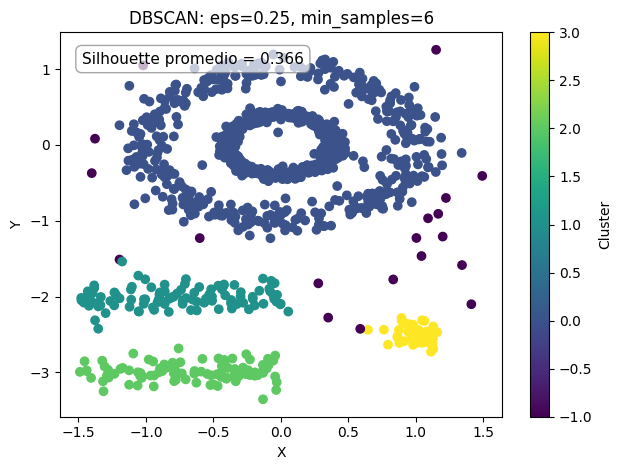

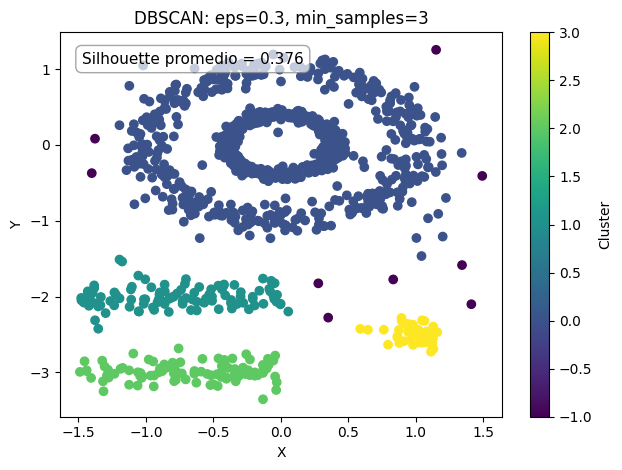

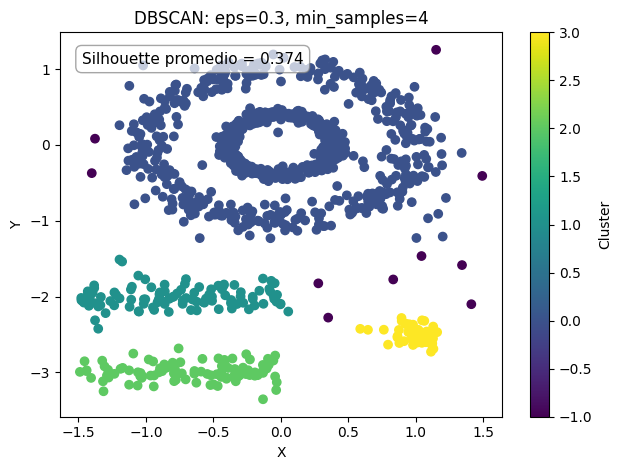

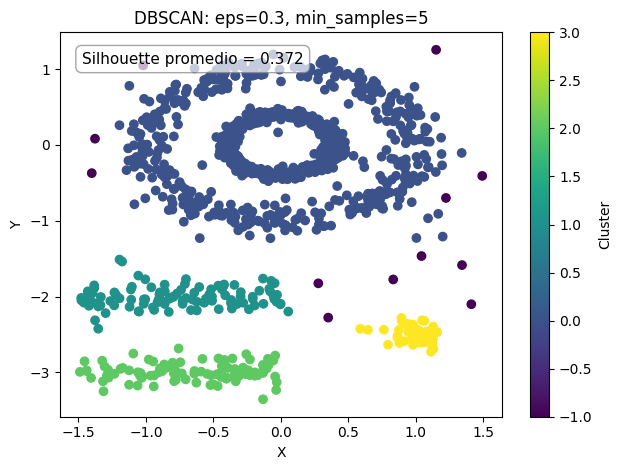

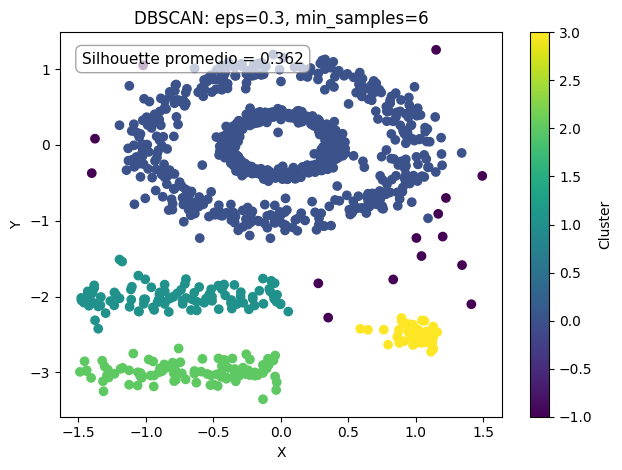

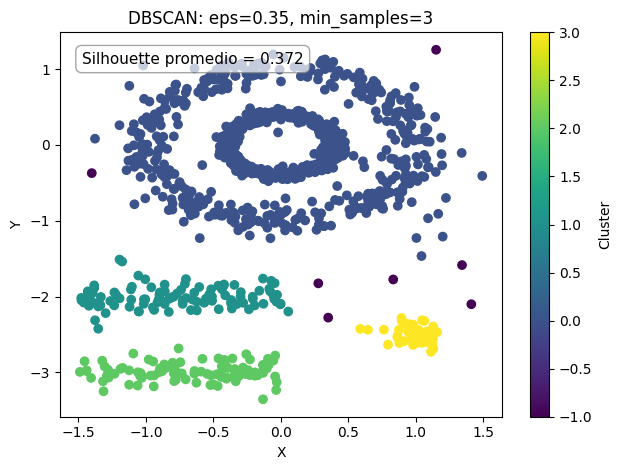

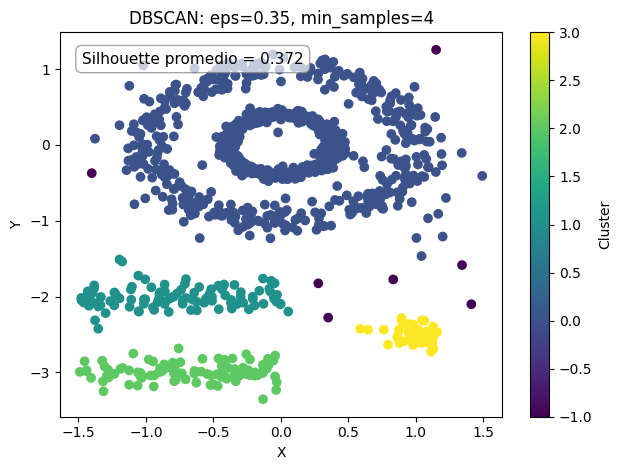

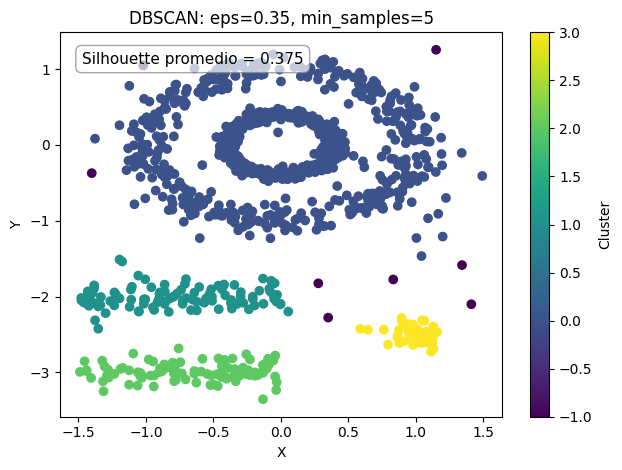

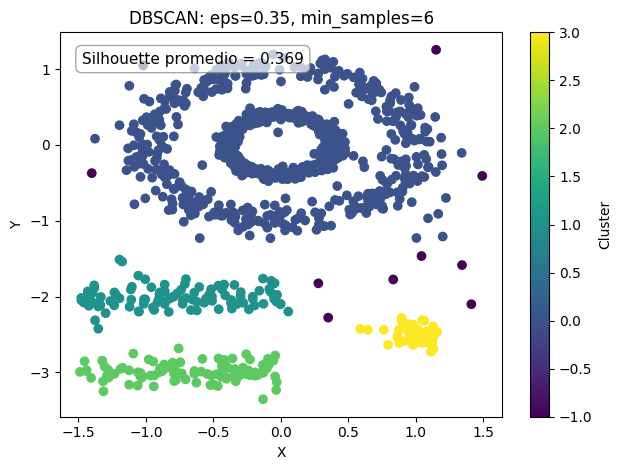

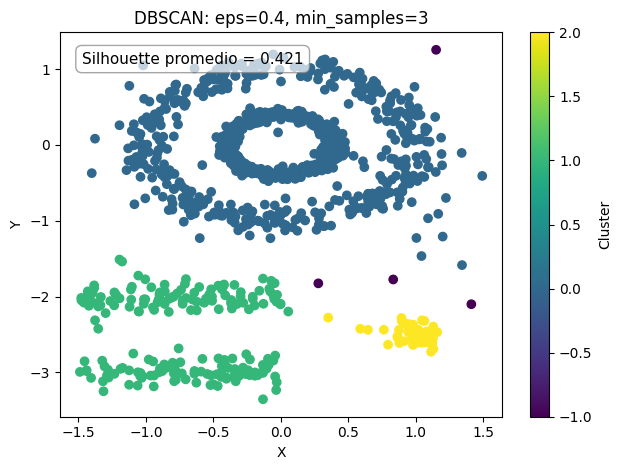

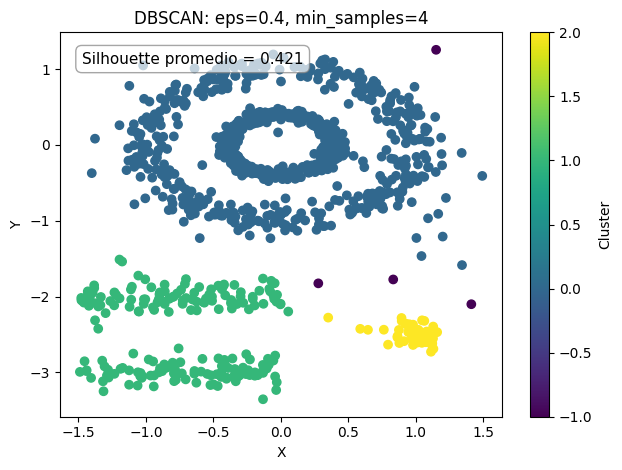

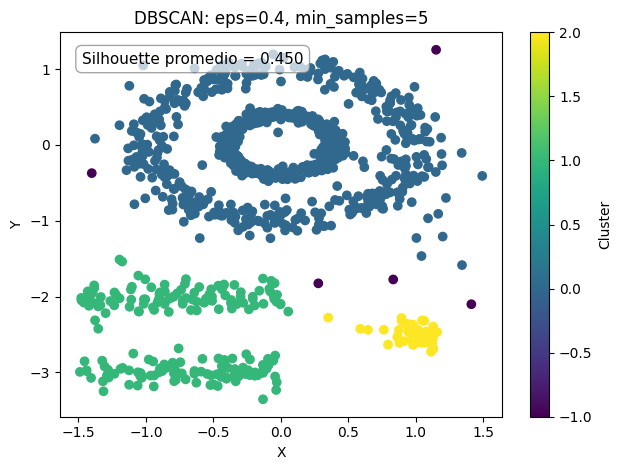

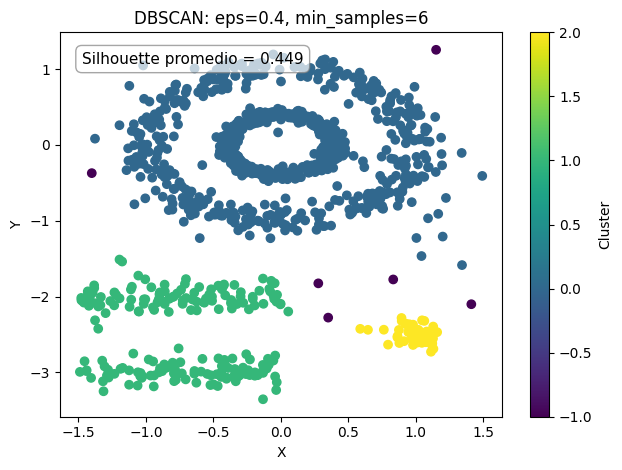

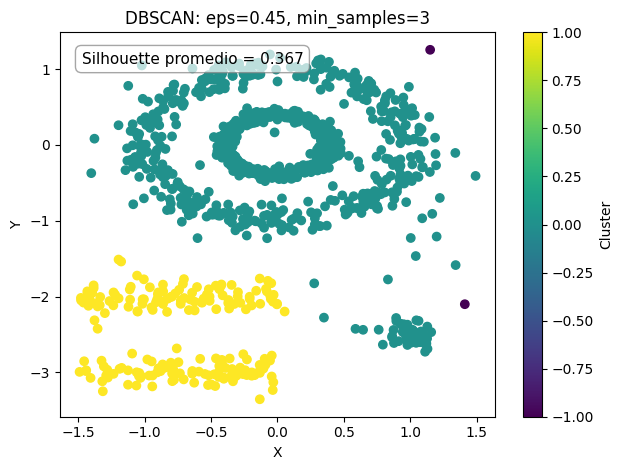

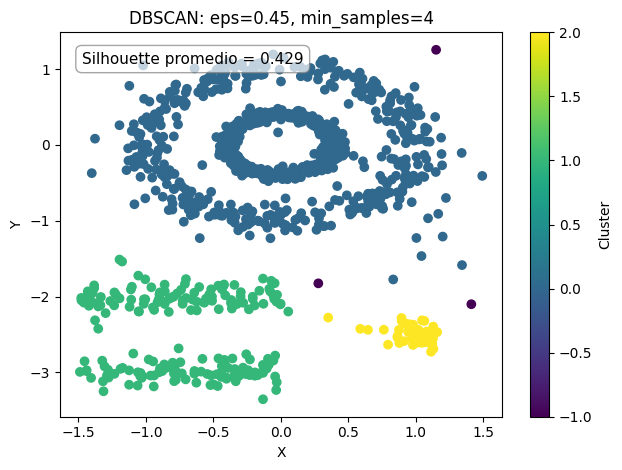

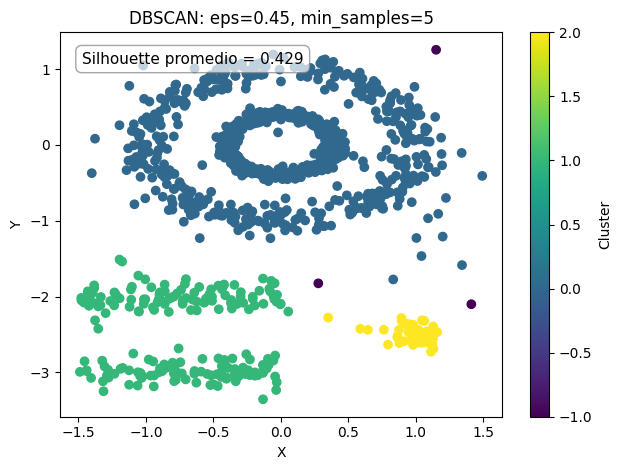

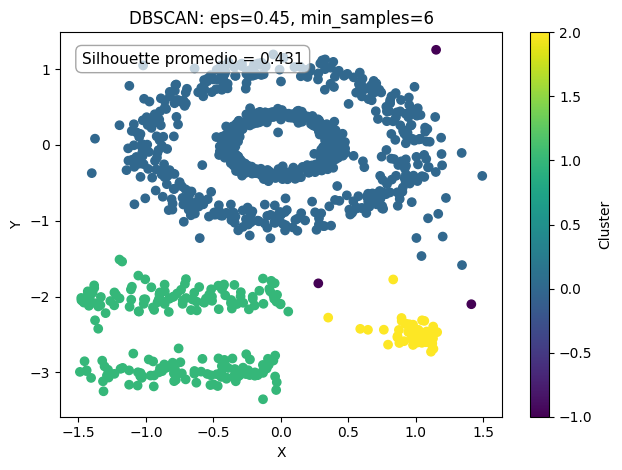

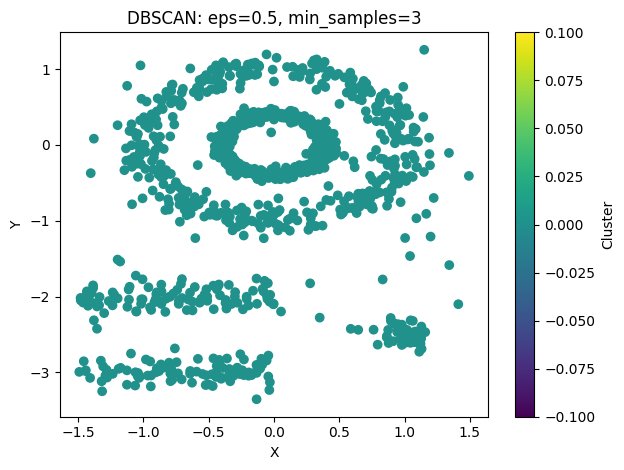

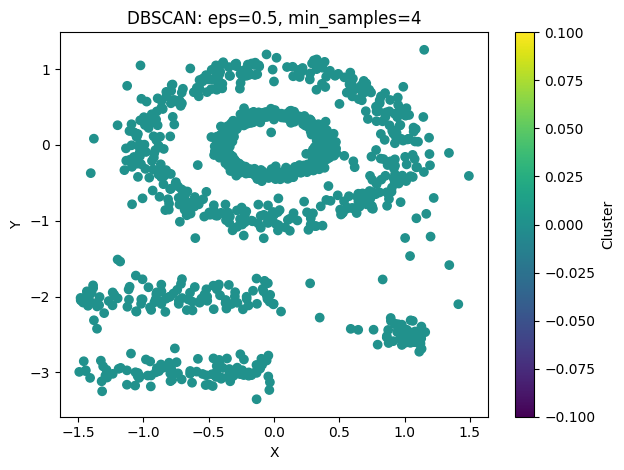

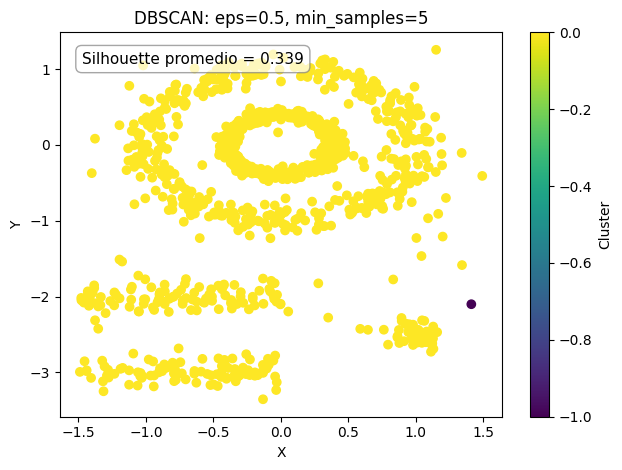

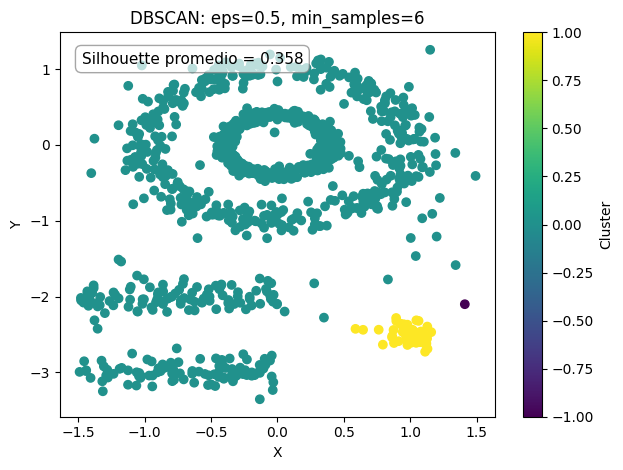

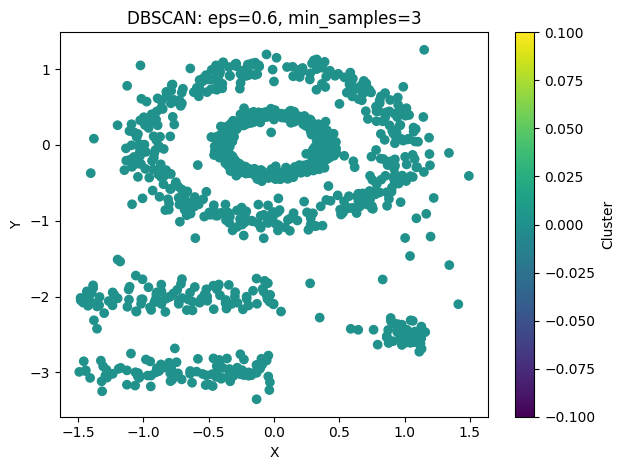

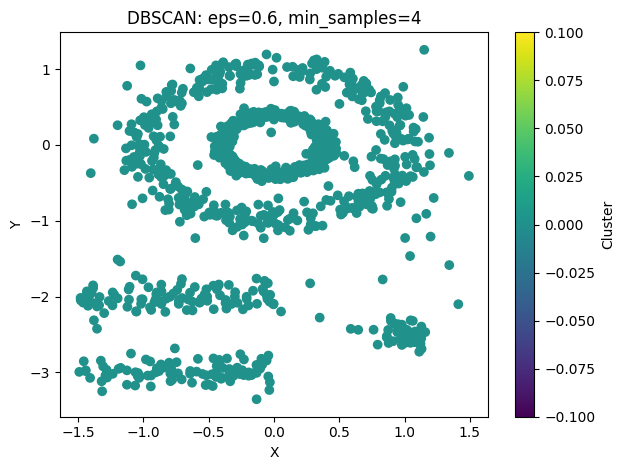

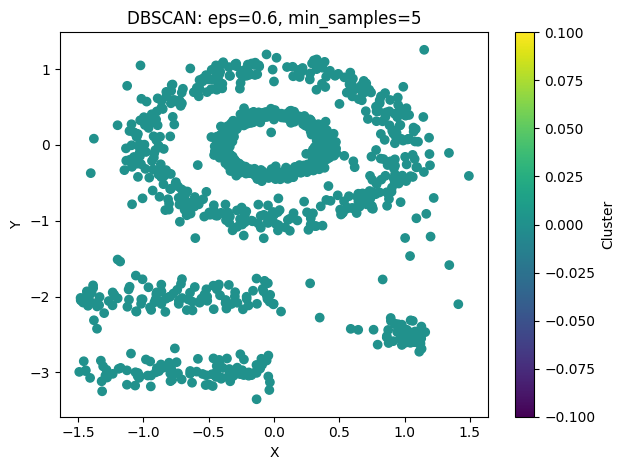

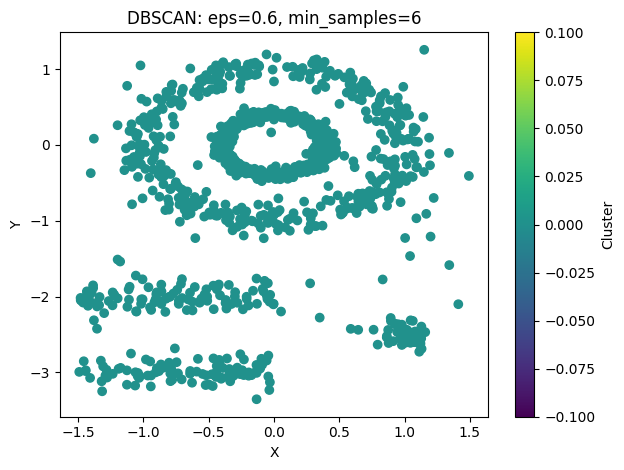

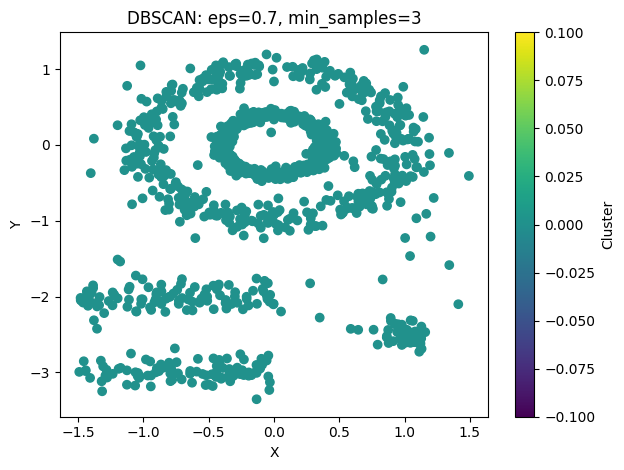

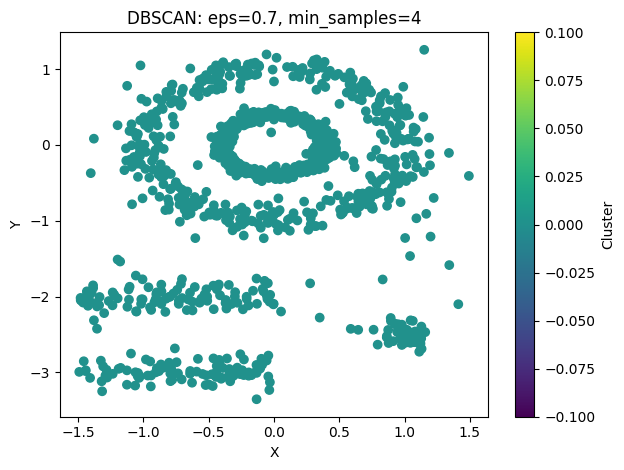

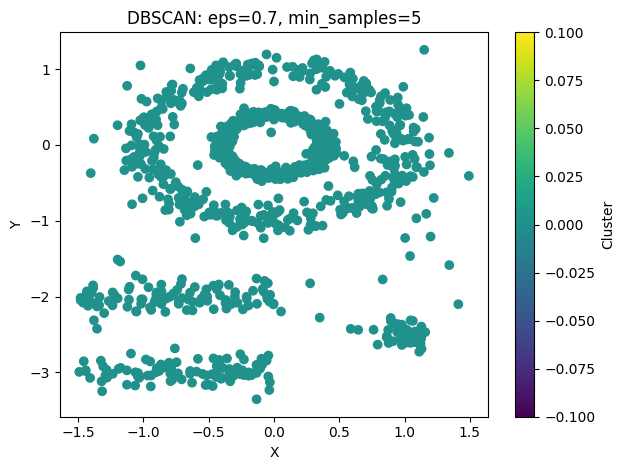

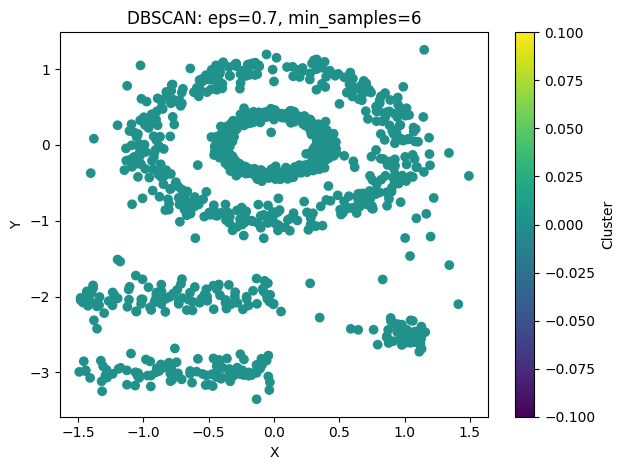

In [45]:
eps_values = [0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7]

min_samples_values = [3, 4, 5, 6]


for eps in eps_values:

    for min_samples in min_samples_values:

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        clusters = dbscan.fit_predict(data_scaled)
        plt.scatter(data['x'], data['y'], c=clusters, cmap='viridis')

        plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}')

        plt.xlabel('X')

        plt.ylabel('Y')

        plt.colorbar(label='Cluster')


        if len(set(clusters)) > 1:
            silhouette_avg = silhouette_score(data_scaled, clusters)
            plt.text(
                0.05, 0.95, f"Silhouette promedio = {silhouette_avg:.3f}",
                transform=plt.gca().transAxes,   # Coordenadas relativas (0–1)
                fontsize=11,
                color='black',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.4'),
                verticalalignment='top'
            )

        plt.tight_layout()
        plt.show()

Teniendo en cuenta que se requiere identificar claramente 5 clusters, el modelo que mejor se ajusta teniendo en cuenta el valor de silhouette, es el modelo con:

epsilon = 0.2

min_samples = 4

silhouette = 0.209

**6. Configurar los hiperparámetros**


Teniendo en cuenta el resultado anterior se configuran los hiperparámetros para el algoritmo DBSCAN:

**epsilon (eps):** define el radio de proximidad para los puntos vecinos. En este caso, está configurado como 0.2, lo que significa que sólo los puntos dentro de este radio se considerarán vecinos.

**min_samples: **especifica el número mínimo de puntos en la vecindad para que un punto sea considerado como un "punto central". Está configurado en 4.

Luego, se aplica DBSCAN a los datos estandarizados con dbscan.fit_predict(data_scaled),
que realiza el clustering y asigna etiquetas a cada punto de datos.


In [46]:
# --- Hiperparámetros ---
epsilon = 0.2 # Ajustar según los datos
min_samples = 4 # Ajustar según los datos
# Aplicar DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean')
clusters = dbscan.fit_predict(data_scaled)
clusters

array([0, 0, 0, ..., 4, 4, 4])

**El número -1:** en DBSCAN, el valor -1 identifica puntos clasificados como ruido. Esto ocurre
cuando un punto no pertenece a ningún clúster por las siguientes razones.
* Vecinos insuficientes: el número de puntos dentro del radio epsilon no alcanza el umbral min_samples.
* Densidad aislada: los puntos están demasiado dispersos y no forman parte de ninguna región densa.

**Cantidad de clústeres:** en el resultado proporcionado, los clústeres únicos (excluyendo -1)
son:
[0, 1, 2, 3, 4]
Esto indica que se detectaron 5 clústeres válidos.

**7. Asignar los clientes a los clústeres**

In [47]:
#Asignar el clúster
data['Cluster'] = clusters
data

x         y  Cluster
0    -0.803739 -0.853053        0
1     0.852851  0.367618        0
2     0.927180 -0.274902        0
3    -0.752626 -0.511565        0
4     0.706846  0.810679        0
...        ...       ...      ...
1095  0.956063 -2.473828        4
1096  0.930758 -2.366531        4
1097  0.989555 -2.475225        4
1098  0.979200 -2.637578        4
1099  1.121931 -2.619054        4

[1100 rows x 3 columns]

In [48]:
# Calcular el Silhouette Score (si hay más de 1 clúster)
if len(set(clusters)) > 1:
  silhouette_avg = silhouette_score(data_scaled, clusters)
  print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2085832935756219


Este código calcula el Silhouette Score, que mide qué tan bien definidos están los clústeres creados por el algoritmo DBSCAN. Si hay más de un clúster (excluyendo ruido), el Silhouette
Score varía entre -1 y 1:

* Valores cercanos a 1 indican clústeres compactos y bien separados.
* Valores cercanos a 0 indican clústeres solapados.
* Valores negativos sugieren asignaciones incorrectas.

En este caso se evidencia que deberíamos hacer algunos procesos adicionales de ingeniería
de características. Si todos los puntos están en un único clúster o ruido, el score no se calcula
para evitar resultados irrelevantes.

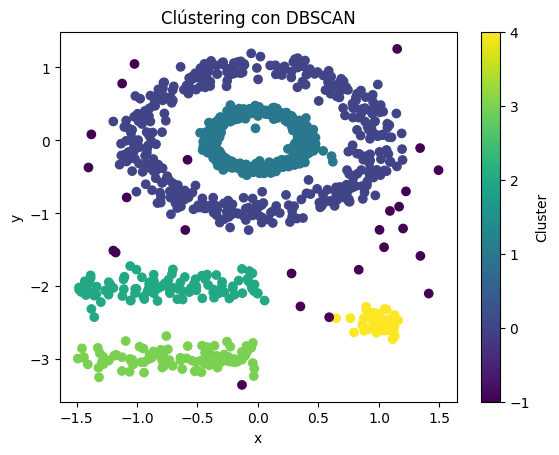

In [23]:
# Visualización
plt.scatter(data['x'], data['y'], c=data['Cluster'], cmap='viridis')
plt.title("Clústering con DBSCAN")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Cluster")
plt.show()

**8. Salida final**

**Número de clústeres encontrados:** indica cuántos grupos se identificaron en los datos.

**Número de outliers encontrados:** muestra cuántos puntos no pertenecen a ningún clúster (ruido).

In [26]:
# Número de clústeres y observaciones "outliers"
# ==============================================================================
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Número de clústeres encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

Número de clústeres encontrados: 5
Número de outliers encontrados: 25


**9. Conclusión final**

Teniendo en cuenta que para el dataset suministrado se solicita identificar 5 clusters, el modelo DBSCAN que mejor se ajusta es con los hiperparámetros epsilon = 0.2, min_samples = 4,silhouette = 0.209; donde el valor de silhouette cercano a cero indica que muchos puntos están cerca de los bordes entre clústeres.Sin embargo, el número de outliers (25) o ruido encontrados representa solo un 2,27% de los datos totales, lo que da consistencia al modelo.